In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
from datetime import datetime

date_string = '1/2/2008'
date_object = datetime.strptime(date_string, '%m/%d/%Y')

print(date_object)


timestamp_float = date_object.timestamp()
print(timestamp_float)



2008-01-02 00:00:00
1199212200.0


In [3]:
###DATA COLLECTION AND PREPROCESSING

gold_data = pd.read_csv(r"C:\Users\thisi\Desktop\ml\goldpriceprediction[AJ]\dataset\gld_price_data.csv")

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.shape

(2290, 6)

In [6]:
# getting basic info
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
##checking for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
## getting a statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
## correlation
## 1. positive correlation
## 2. negetive correlation

# Assuming 'Date' is the column causing the issue
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

# Drop rows with missing dates (NaT after conversion)
gold_data = gold_data.dropna(subset=['Date'])

# Now, calculate the correlation matrix
correlation = gold_data.corr()


In [13]:
correlation = gold_data.corr()

<Axes: >

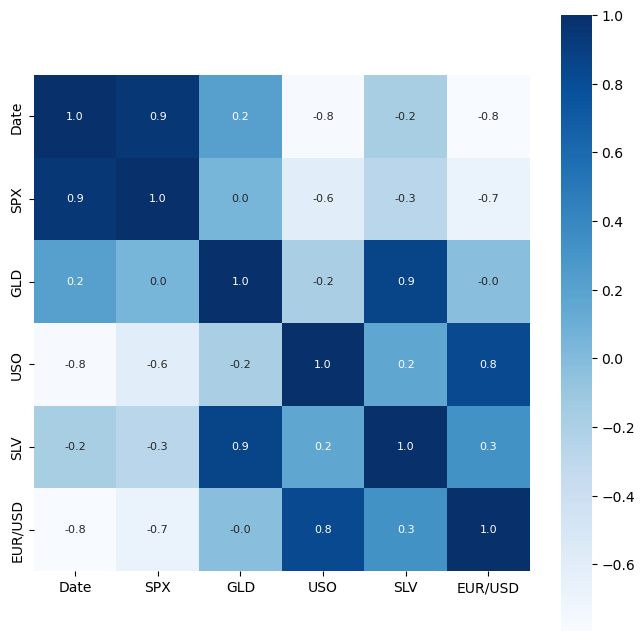

In [16]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\thisi\AppData\Local\Temp\ipykernel_17268\4019792767.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

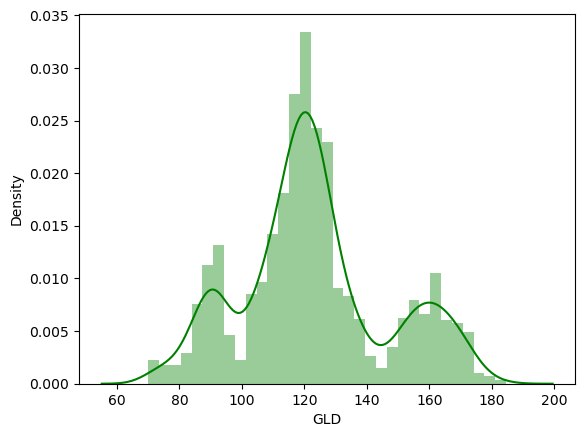

In [20]:
sns.distplot(gold_data['GLD'],color='green')


In [ ]:
## Splitting the Features and Target

In [21]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [24]:
## spliting training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [25]:
## model training : random forest regressor

regressor = RandomForestRegressor(n_estimators=100)

In [26]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [27]:
## model evaluation

# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [28]:
print(test_data_prediction)

[168.61229939  82.21929977 115.9478005  127.79710057 120.69880133
 154.6865982  150.11099836 126.12840042 117.6094987  125.96670064
 116.55270118 171.56080075 141.24759909 167.58499844 115.18680003
 117.6822006  138.19180283 169.95990071 158.62390241 159.75339957
 155.16000069 125.20740018 176.38160029 157.41550294 125.15210035
  93.74829964  77.84550036 120.65239982 119.14629983 167.33629943
  88.1258005  125.36180018  91.04130067 117.6461002  120.93819989
 135.88830039 115.35830113 114.9193009  146.49969972 107.407001
 104.16480234  87.25519788 126.42880071 117.84980002 153.37469896
 119.58760048 108.34470021 108.14499845  93.21910074 127.10749776
  75.53140019 113.67259902 121.38460014 111.33139939 118.86559888
 120.74819926 159.41709983 169.81590105 146.87419643  85.89759872
  94.15390047  86.79019899  90.49280046 119.03760107 126.43280046
 127.81560037 167.86409981 122.1404995  117.36059907  98.59390051
 167.59190114 143.04639866 132.37370209 121.21010223 121.22559946
 120.0730003

In [29]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9896687116689885


In [30]:
## Compare the Actual Values and Predicted Values in a Plot

Y_test = list(Y_test)

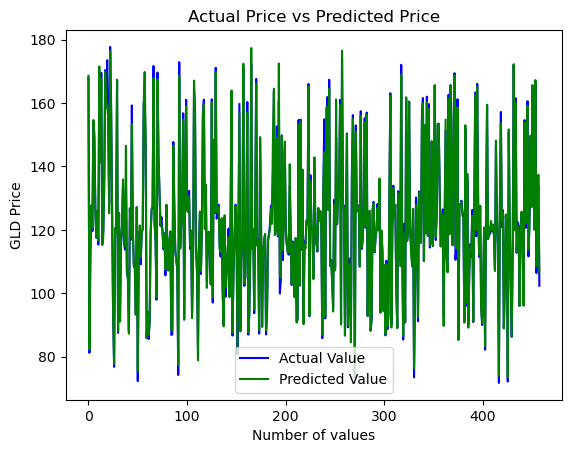

In [31]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()